# Import libraries and data

In [1]:
#import libraries
import numpy as np
import pandas as pd 
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


# Statsmodel 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import classification_report
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

C:\Users\NEHA\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [2]:
#import dataset
dfTemp = pd.read_csv (r'C:\Users\NEHA\Desktop\MPS\ALY 6020\M4\Nashville_housing.csv')   #read the csv file 


In [3]:
print(dfTemp.shape)

(56636, 31)


In [4]:
dfTemp.columns.values

array(['Unnamed: 0.1', 'Unnamed: 0', 'Parcel ID', 'Land Use',
       'Property Address', 'Suite/ Condo   #', 'Property City',
       'Sale Date', 'Sale Price', 'Legal Reference', 'Sold As Vacant',
       'Multiple Parcels Involved in Sale', 'Owner Name', 'Address',
       'City', 'State', 'Acreage', 'Tax District', 'Neighborhood',
       'image', 'Land Value', 'Building Value', 'Total Value',
       'Finished Area', 'Foundation Type', 'Year Built', 'Exterior Wall',
       'Grade', 'Bedrooms', 'Full Bath', 'Half Bath'], dtype=object)

# Data Cleaning

In [5]:
#drop coulmns
dfTemp=dfTemp.drop(['Suite/ Condo   #','Unnamed: 0.1', 'Unnamed: 0','Parcel ID','Legal Reference',
                    'Address','Property Address',
                   'State','City','Owner Name','Sale Date','image'], axis=1)


In [6]:
##Checking the null values
dfTemp.isnull().sum()

Land Use                                 0
Property City                          159
Sale Price                               0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
Acreage                              30619
Tax District                         30619
Neighborhood                         30619
Land Value                           30619
Building Value                       30619
Total Value                          30619
Finished Area                        32470
Foundation Type                      32472
Year Built                           32471
Exterior Wall                        32471
Grade                                32471
Bedrooms                             32477
Full Bath                            32359
Half Bath                            32490
dtype: int64

In [7]:
# drop nan values
dfTemp=dfTemp.dropna()

In [8]:
##Checking the null values
dfTemp.isnull().sum()

Land Use                             0
Property City                        0
Sale Price                           0
Sold As Vacant                       0
Multiple Parcels Involved in Sale    0
Acreage                              0
Tax District                         0
Neighborhood                         0
Land Value                           0
Building Value                       0
Total Value                          0
Finished Area                        0
Foundation Type                      0
Year Built                           0
Exterior Wall                        0
Grade                                0
Bedrooms                             0
Full Bath                            0
Half Bath                            0
dtype: int64

In [9]:

from skimpy import clean_columns
# clean column names
df = clean_columns(dfTemp, case = 'pascal')
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['LandUse', 'PropertyCity', 'SalePrice', 'SoldAsVacant',
       'MultipleParcelsInvolvedInSale', 'Acreage', 'TaxDistrict',
       'Neighborhood', 'LandValue', 'BuildingValue', 'TotalValue',
       'FinishedArea', 'FoundationType', 'YearBuilt', 'ExteriorWall', 'Grade',
       'Bedrooms', 'FullBath', 'HalfBath'],
      dtype='object')>

In [10]:
#Checking info of various columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24011 entries, 1 to 56616
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   LandUse                        24011 non-null  object 
 1   PropertyCity                   24011 non-null  object 
 2   SalePrice                      24011 non-null  int64  
 3   SoldAsVacant                   24011 non-null  object 
 4   MultipleParcelsInvolvedInSale  24011 non-null  object 
 5   Acreage                        24011 non-null  float64
 6   TaxDistrict                    24011 non-null  object 
 7   Neighborhood                   24011 non-null  float64
 8   LandValue                      24011 non-null  float64
 9   BuildingValue                  24011 non-null  float64
 10  TotalValue                     24011 non-null  float64
 11  FinishedArea                   24011 non-null  float64
 12  FoundationType                 24011 non-null 

In [11]:
# convert year birth to age 
from datetime import date
from datetime import datetime
df['YearBuilt']= df['YearBuilt'].astype(int)
df['YearsOld'] = (2022 - df['YearBuilt'])

In [12]:
df=df.drop(['YearBuilt'], axis=1)

# Descriptive Analytics

In [13]:
# Statistical summary of numeric variables
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
SalePrice,24011.0,274930.34,303122.38,100.00,125000.00,185000.00,324900.00,10750000.00
Acreage,24011.0,0.45,0.79,0.04,0.19,0.27,0.45,47.50
Neighborhood,24011.0,4424.38,2138.22,107.00,3130.00,4026.00,6229.00,9530.00
LandValue,24011.0,68938.61,101886.45,100.00,21900.00,29900.00,60300.00,1869000.00
BuildingValue,24011.0,172275.02,192724.76,1400.00,83500.00,117100.00,188500.00,5824300.00
TotalValue,24011.0,243867.56,271162.39,12600.00,109400.00,154200.00,277800.00,6402600.00
FinishedArea,24011.0,1914.85,1103.53,450.00,1236.00,1629.00,2210.82,19728.25
Bedrooms,24011.0,3.09,0.85,0.00,3.00,3.00,3.00,11.00
FullBath,24011.0,1.89,0.95,0.00,1.00,2.00,2.00,10.00
HalfBath,24011.0,0.29,0.49,0.00,0.00,0.00,1.00,3.00


# Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of Sale Price')

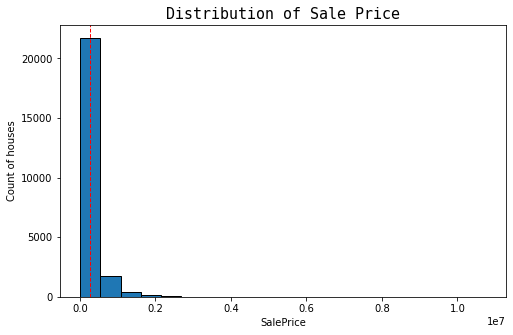

In [20]:
###Visualising the target variable for checking distribution
#barplot for sale price
plt.figure(figsize=(8, 5))
plt.hist(df.SalePrice, 20,edgecolor='k')
plt.axvline(df.SalePrice.mean(), color='r', linestyle='dashed', linewidth=1)
plt.xlabel("SalePrice")
plt.ylabel("Count of houses")
plt.title('Distribution of Sale Price', fontdict={
          'fontname': 'Monospace', 'fontsize': 15})

In [14]:
# Replace values with median
df['SalePrice'].mask(df['SalePrice'] >= 400000 ,400000, inplace=True)

Text(0.5, 1.0, 'Distribution of Sale Price')

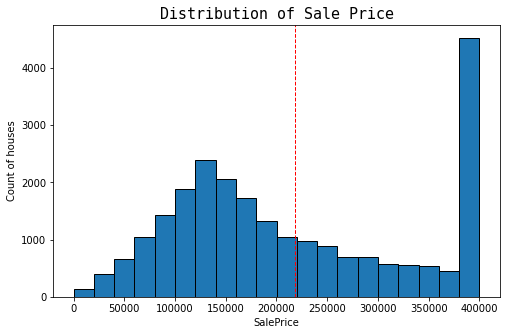

In [22]:
###Visualising the target variable for checking distribution
#barplot for sale price
plt.figure(figsize=(8, 5))
plt.hist(df.SalePrice, 20,edgecolor='k')
plt.axvline(df.SalePrice.mean(), color='r', linestyle='dashed', linewidth=1)
plt.xlabel("SalePrice")
plt.ylabel("Count of houses")
plt.title('Distribution of Sale Price', fontdict={
          'fontname': 'Monospace', 'fontsize': 15})

Text(0.5, 1.0, 'Distribution of Land Value')

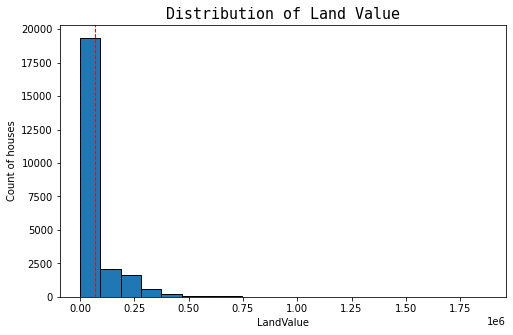

In [23]:
###Visualising the target variable for checking distribution
#barplot for sale price
plt.figure(figsize=(8, 5))
plt.hist(df.LandValue, 20,edgecolor='k')
plt.axvline(df.LandValue.mean(), color='r', linestyle='dashed', linewidth=1)
plt.xlabel("LandValue")
plt.ylabel("Count of houses")
plt.title('Distribution of Land Value', fontdict={
          'fontname': 'Monospace', 'fontsize': 15})

In [15]:
# Replace values with median
df['LandValue'].mask(df['LandValue'] >= 100000 ,100000, inplace=True)

Text(0.5, 1.0, 'Land Value vs Sale Price')

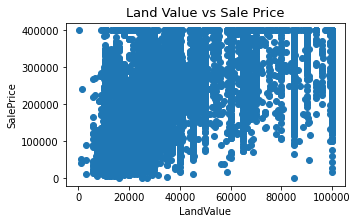

In [54]:

plt.figure(figsize=(5,3))
scatter= plt.scatter(x=df.LandValue,
            y=df.SalePrice)
plt.xlabel("LandValue", size=10)
plt.ylabel("SalePrice", size=10)
plt.title('Land Value vs Sale Price', fontdict={
           'fontsize': 13})



Text(0.5, 1.0, 'Land Value vs Sale Price')

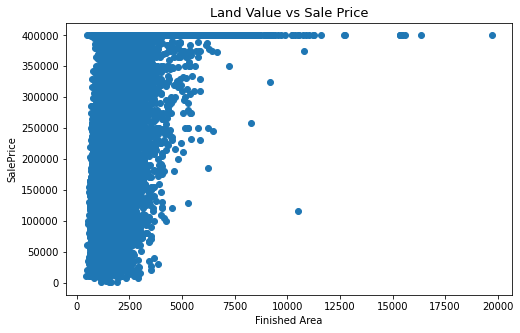

In [17]:

plt.figure(figsize=(8,5))
scatter= plt.scatter(x=df.FinishedArea,
            y=df.SalePrice)
plt.xlabel("Finished Area", size=10)
plt.ylabel("SalePrice", size=10)
plt.title('Land Value vs Sale Price', fontdict={
           'fontsize': 13})

In [18]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode "object" type labels in column 
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])
        #view encoded data
print(df.head())

   LandUse  PropertyCity  SalePrice  SoldAsVacant  \
1       18             7     191500             0   
2       18             7     202000             0   
3       18             7      32000             0   
4       18             7     102000             0   
5       18             7      93736             0   

   MultipleParcelsInvolvedInSale  Acreage  TaxDistrict  Neighborhood  \
1                              0     0.17            6        3127.0   
2                              0     0.11            1        9126.0   
3                              0     0.17            6        3130.0   
4                              0     0.34            6        3130.0   
5                              0     0.17            6        3130.0   

   LandValue  BuildingValue  TotalValue  FinishedArea  FoundationType  \
1    32000.0       134400.0    168300.0    1149.00000               3   
2    34000.0       157800.0    191800.0    2090.82495               4   
3    25000.0       243700.0  

<AxesSubplot:>

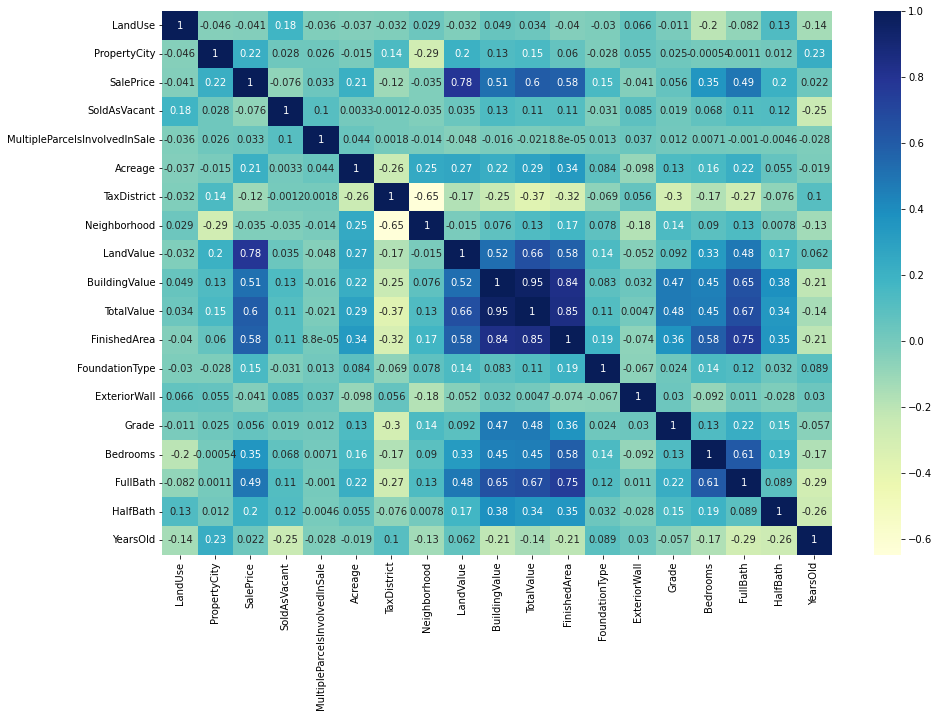

In [30]:
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True,cmap="YlGnBu")

In [19]:
df=df.drop(['LandUse','ExteriorWall',"Neighborhood",'SoldAsVacant','MultipleParcelsInvolvedInSale','TotalValue','YearsOld'],axis=1)

<AxesSubplot:>

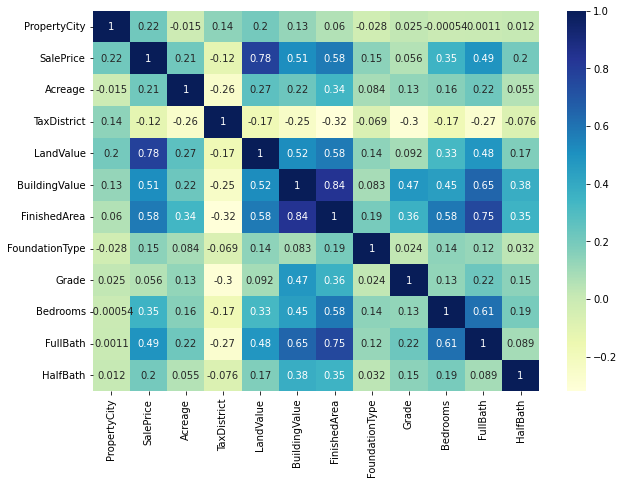

In [32]:
corr = df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True,cmap="YlGnBu")

In [20]:
#multicollineariry
df = df._get_numeric_data()
V=df.drop(['SalePrice'], axis=1)

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(V.values, i) for i in range(V.shape[1])]
vif['Features'] = V.columns
vif.round(1)

,VIF Factor,Features
0,12.0,PropertyCity
1,1.6,Acreage
2,17.5,TaxDistrict
3,5.0,LandValue
4,7.2,BuildingValue
5,23.4,FinishedArea
6,1.5,FoundationType
7,4.1,Grade
8,22.5,Bedrooms
9,14.5,FullBath


# Split target and feature

In [21]:
#split column names _ feature
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [22]:
X.head()

,PropertyCity,Acreage,TaxDistrict,LandValue,BuildingValue,FinishedArea,FoundationType,Grade,Bedrooms,FullBath,HalfBath
1,7,0.17,6,32000.0,134400.0,1149.00000,3,3,2.0,1.0,0.0
2,7,0.11,1,34000.0,157800.0,2090.82495,4,3,3.0,2.0,1.0
3,7,0.17,6,25000.0,243700.0,2145.60001,1,2,4.0,2.0,0.0
4,7,0.34,6,25000.0,138100.0,1969.00000,0,3,2.0,1.0,0.0
5,7,0.17,6,25000.0,86100.0,1037.00000,0,3,2.0,1.0,0.0


# split test train

In [23]:
###Splitting the data into train-test set
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=30)

In [24]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16807, 11)
X_test shape: (7204, 11)
y_train shape: (16807,)
y_test shape: (7204,)


# feature scaling

In [25]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

X_train_norm

array([[0.77777778, 0.00252845, 1.        , ..., 0.27272727, 0.2       ,
        0.        ],
       [0.77777778, 0.01790982, 1.        , ..., 0.36363636, 0.3       ,
        0.        ],
       [0.88888889, 0.00400337, 0.83333333, ..., 0.27272727, 0.2       ,
        0.        ],
       ...,
       [0.77777778, 0.00358196, 1.        , ..., 0.18181818, 0.1       ,
        0.        ],
       [0.77777778, 0.01074589, 0.83333333, ..., 0.27272727, 0.2       ,
        0.        ],
       [0.77777778, 0.00400337, 1.        , ..., 0.27272727, 0.2       ,
        0.        ]])

# Linear Regression

In [26]:
# Adding constant because statsmodel library doesn't include the intercept by default. 
X_train_sm = sm.add_constant(X_train_norm)
# Creating model
model_sm1 = sm.OLS(y_train, X_train_sm)
lm= model_sm1.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     2899.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        00:30:49   Log-Likelihood:            -2.1099e+05
No. Observations:               16807   AIC:                         4.220e+05
Df Residuals:                   16795   BIC:                         4.221e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.082e+04   4860.908      6.341      0.0

In [27]:
from sklearn.metrics import r2_score,mean_squared_error
model = LinearRegression()  # initialize the LinearRegression model
model.fit(X_train_norm,y_train)  # we fit the model with the training data

y_pred1 = model.predict(X_test_norm)  # make prediction with the fitted model

# score the model on the train set
print('Train score: {}\n'.format(model.score(X_train_norm,y_train)))
# score the model on the test set
print('Test score: {}\n'.format(model.score(X_test_norm,y_test)))
# calculate the overall accuracy of the model
print('Overall model accuracy: {}\n'.format(r2_score(y_test,y_pred1)))
# compute the mean squared error of the model
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,y_pred1)))

Train score: 0.655038746506843

Test score: 0.648232937192831

Overall model accuracy: 0.648232937192831

Mean Squared Error: 4681718287.882353


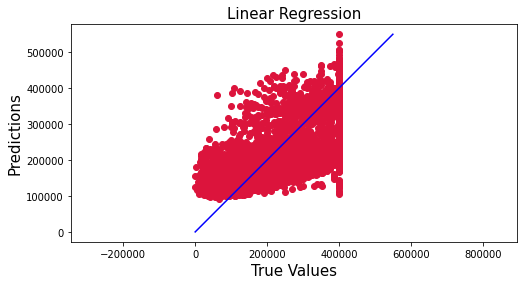

In [28]:
plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred1, c='crimson')


p1 = max(max(y_pred1), max(y_test))
p2 = min(min(y_pred1), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Linear Regression', fontsize=15)
plt.axis('equal')
plt.show()

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k= 'all')
fit = bestfeatures.fit(X_train_norm, y_train)
dfscores = pd.DataFrame(fit.scores_)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Variables','Score']  #naming the dataframe columns
print(featureScores.sort_values(by="Score",ascending=False)) # print features in descending order of score


         Variables      Score
3        LandValue 2726.31513
6   FoundationType 1034.99354
10        HalfBath  720.69866
5     FinishedArea  319.20280
9         FullBath  281.44553
0     PropertyCity  237.54513
4    BuildingValue  218.51437
8         Bedrooms   84.40538
1          Acreage   62.30528
7            Grade   53.60743
2      TaxDistrict   45.03419


# Decision tree

In [30]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=5)
DT_reg=regressor.fit(X_train_norm, y_train)
print(DT_reg.score(X_train_norm, y_train))
print(DT_reg.score(X_test_norm, y_test))

0.7256085105600826
0.7059435573394982


In [31]:
y_pred2=DT_reg.predict(X_test_norm)
# calculate the overall accuracy of the model
print('Overall model accuracy: {}\n'.format(r2_score(y_test,y_pred2)))
# compute the mean squared error of the model
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,y_pred2)))

Overall model accuracy: 0.7059435573394982

Mean Squared Error: 3913639367.731171


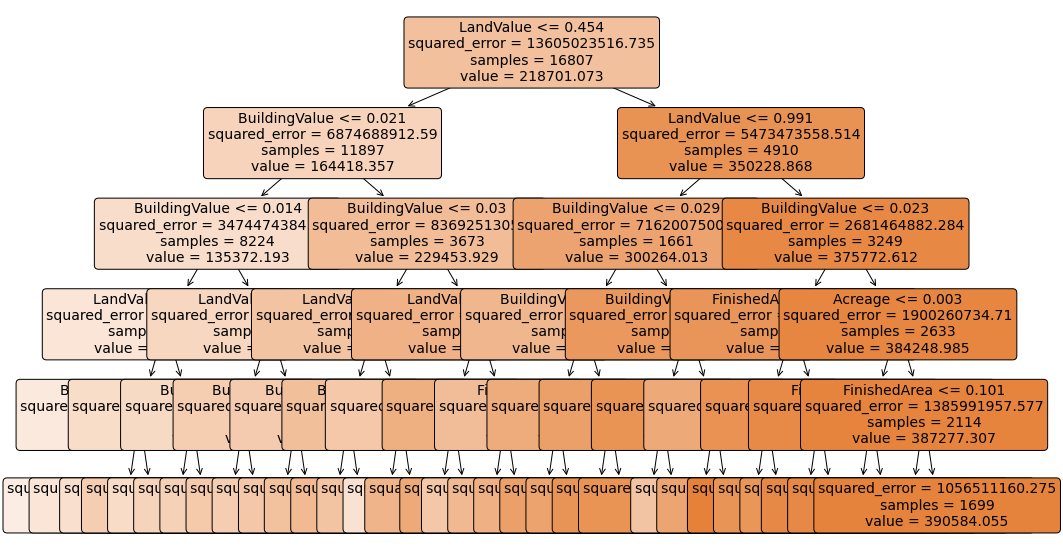

In [32]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
a = plot_tree(regressor, 
              feature_names=X_train.columns, 
              class_names=y_train, 
              filled=True, 
              rounded=True, 
              fontsize=14)

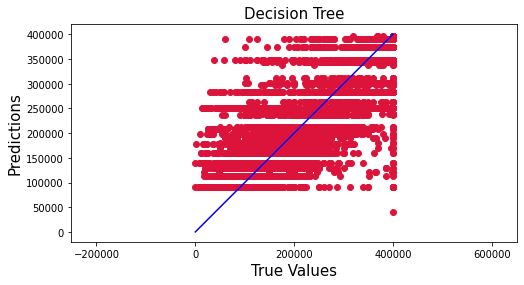

In [33]:
plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred2, c='crimson')


p1 = max(max(y_pred2), max(y_test))
p2 = min(min(y_pred2), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Decision Tree', fontsize=15)
plt.axis('equal')
plt.show()

# Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(max_depth=5, random_state = 30)
RF.fit(X_train_norm, y_train)

RandomForestRegressor(max_depth=5, random_state=30)

In [35]:
print(RF.score(X_train_norm, y_train))
print(RF.score(X_test_norm, y_test))

0.7321089650311257
0.7161253994152825


In [36]:
y_pred3=RF.predict(X_test_norm)
# calculate the overall accuracy of the model
print('Overall model accuracy: {}\n'.format(r2_score(y_test,y_pred3)))
# compute the mean squared error of the model
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,y_pred3)))

Overall model accuracy: 0.7161253994152825

Mean Squared Error: 3778127771.306748


In [37]:
len(RF.estimators_)

100

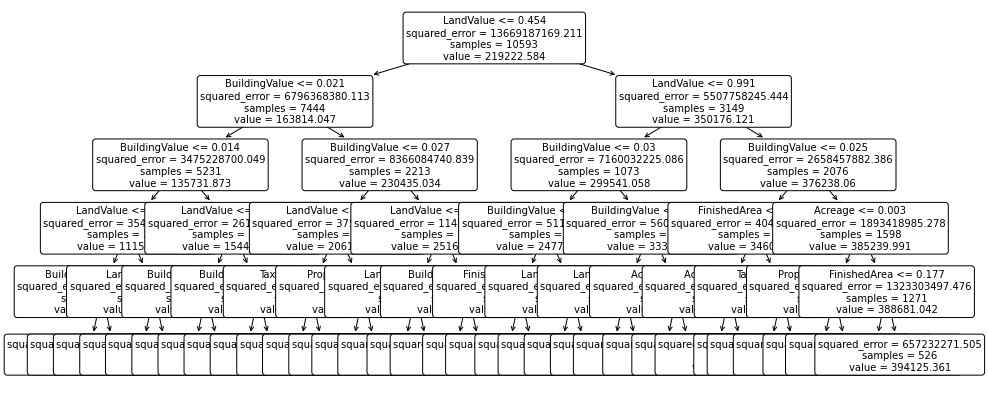

In [38]:
from sklearn import tree
plt.figure(figsize=(15,7))
_ = tree.plot_tree(RF.estimators_[0],
                   feature_names=X.columns,
              rounded=True, 
              fontsize=10)

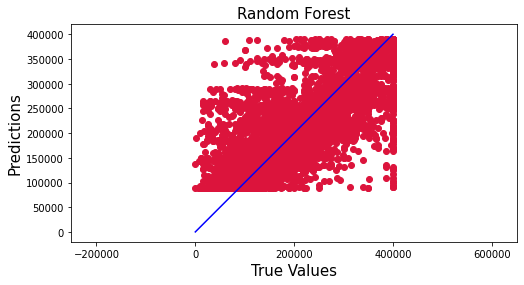

In [39]:
plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred3, c='crimson')


p1 = max(max(y_pred3), max(y_test))
p2 = min(min(y_pred3), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Random Forest', fontsize=15)
plt.axis('equal')
plt.show()

# XGBOOST MODEL

In [40]:
xgb1 = XGBRegressor(max_depth=5)
xg=xgb1.fit(X_train_norm, y_train)
y_pred4 = xg.predict(X_test_norm)

# calculate the overall accuracy of the model
print('Overall model accuracy: {}\n'.format(r2_score(y_test,y_pred4)))
# compute the mean squared error of the model
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,y_pred4)))

Overall model accuracy: 0.7032708211232679

Mean Squared Error: 3949211197.3457894


In [41]:
print(xg.score(X_train_norm, y_train))
print(xg.score(X_test_norm, y_test))

0.8051425026886763
0.7032708211232679


In [42]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

NameError: name 'importances' is not defined

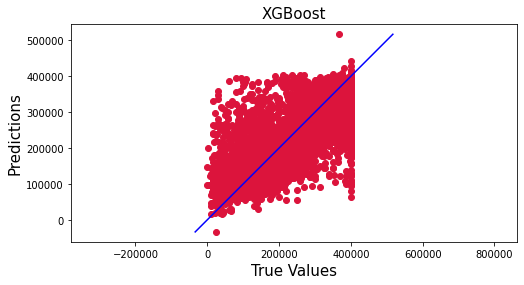

In [1187]:
plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred4, c='crimson')


p1 = max(max(y_pred4), max(y_test))
p2 = min(min(y_pred4), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('XGBoost', fontsize=15)
plt.axis('equal')
plt.show()

In [1172]:
# Building pipelins of standard scaler and model for varios regressors.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt",DecisionTreeRegressor(max_depth=5))])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf",RandomForestRegressor(max_depth=5))])

pipeline_xgb=Pipeline([("scalar4",StandardScaler()),
                     ("xgb",XGBRegressor(max_depth=5))])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest", 3: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train_norm, y_train)

In [1173]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train_norm,y_train,scoring="neg_root_mean_squared_error", cv=5)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))
 

LinearRegression: 68576.564335 
DecisionTree: 62544.155893 
RandomForest: 61333.290695 
XGBRegressor: 63302.555912 


In [1176]:
# Model prediction on test data with XGBClassifier which gave us the least RMSE 
pred1 = pipeline_lr.predict(X_test_norm)
pred3 = pipeline_dt.predict(X_test_norm)
pred4= pipeline_rf.predict(X_test_norm)
pred5 = pipeline_xgb.predict(X_test_norm)

print("Linear regression R^2:",r2_score(y_test, pred1))
print("Decision Tree     R^2:",r2_score(y_test, pred3))
print("Random Forest     R^2:",r2_score(y_test, pred4))
print("XGBoost           R^2:",r2_score(y_test, pred5))




Linear regression R^2: 0.648232937192831
Decision Tree     R^2: 0.7059435573394982
Random Forest     R^2: 0.7161714081618082
XGBoost           R^2: 0.7033270390347648
